In [28]:
import matplotlib.pyplot as plt
from classical_code import *
from matplotlib.gridspec import GridSpec
import itertools
import numpy as np

In [29]:
def compute_synd_matrix(ccode: ClassicalCode, error, x_z):
    """
    Computes the syndrome matrix of the list of errors error
    x_z specifies if the error is an x-error or a z-error. True if x-error, False if z-error
        If error is an x-error we use the C1 x V2 checks
        If error is a z-error we use the V1 x C2 checks
    """

    vv_error, cc_error = error

    if (x_z):
        synd_matrix = [[False for v2 in range(ccode.n)] for c1 in range(ccode.m)]

        for v1, v2 in vv_error: # this is C1 x V2 check nodes. Size of m x n
            for c1 in ccode.bit_nbhd[v2]:
                synd_matrix[c1][v2] = not synd_matrix[c1][v2]
        for c1, c2 in cc_error:
            for v2 in ccode.check_nbhd[c1]:
                synd_matrix[c1][v2] = not synd_matrix[c1][v2]
    else:
        synd_matrix = [[False for c2 in range(ccode.m)] for v1 in range(ccode.n)]
        for v1, v2 in vv_error: # this is for V1 x C2 check nodes. Size of n x m
            for c2 in ccode.bit_nbhd[v2]:
                synd_matrix[v1][c2] = not synd_matrix[v1][c2]
        for c1, c2 in cc_error:
            for v1 in ccode.check_nbhd[c1]:
                synd_matrix[v1][c2] = not synd_matrix[v1][c2]

    return synd_matrix

In [30]:
ccode = read_code('./ldpc_codes/16_12_3_4.txt')

In [31]:
# vv_errors, cc_errors = random_error(ccode, 0.01)
vv_errors, cc_errors = ([(4, 0), (9, 5), (12, 13)], [(7, 2), (10, 4)])
# vv_errors, cc_errors =([(0, 3), (7, 1), (8, 10), (9, 12), (12, 7), (14, 6)], [])
print(vv_errors, cc_errors)
synd = compute_synd_matrix(ccode, (vv_errors, cc_errors), False)
synd2 = compute_synd_matrix(ccode, (vv_errors, cc_errors), True)

[(4, 0), (9, 5), (12, 13)] [(7, 2), (10, 4)]


In [32]:
synd_points = [(x,y) for x, y in zip(*np.where(synd))]
synd_points2 = [(x,y) for x, y in zip(*np.where(synd2))]

In [33]:
mask = [(0, 3), (0, 6), (0, 7), (0, 11), (1, 0), (1, 2), (1, 3), (1, 6), (1, 9), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 6), (2, 7), (2, 8), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 6), (3, 8), (3, 9), (3, 10), (4, 2), (4, 4), (4, 6), (4, 7), (4, 9), (4, 10), (5, 1), (5, 6), (5, 7), (5, 11), (6, 0), (6, 1), (6, 2), (6, 6), (6, 7), (6, 8), (6, 10), (7, 3), (7, 4), (7, 5), (7, 7), (7, 8), (7, 9), (8, 0), (8, 2), (8, 3), (8, 4), (8, 5), (8, 7), (8, 8), (8, 10), (9, 3), 
(9, 5), (9, 6), (9, 9), (9, 10), (9, 11), (10, 2), (10, 4), (10, 6), (10, 7), (10, 9), (11, 0), (11, 3), (11, 4), (11, 5), (11, 7), (11, 8), (11, 9), (11, 11), (12, 3), (12, 5), (12, 7), (12, 8), (12, 10), (13, 3), (13, 4), (13, 5), (13, 7), (13, 9), (13, 10), (13, 11), (14, 1), (14, 2), (14, 4), (14, 5), (14, 6), (14, 7), (14, 9), (14, 11), (15, 0), (15, 1), (15, 4), (15, 5), (15, 7), (15, 9)]

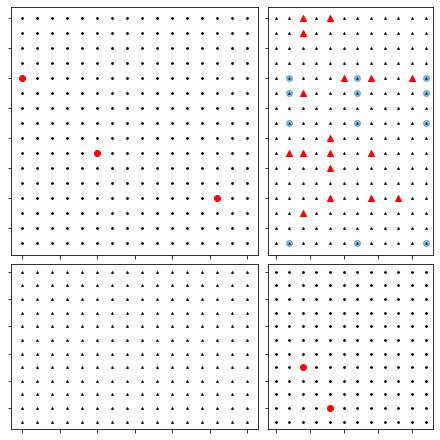

In [38]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        # ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True, figsize=(6,6))

gs = GridSpec(10, 10, figure=fig)
cut_off = 6
ax1 = fig.add_subplot(gs[:cut_off, :cut_off])
ax1.invert_yaxis()


# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[:cut_off, cut_off:])
ax2.invert_yaxis()

ax3 = fig.add_subplot(gs[cut_off:, :cut_off])
ax3.invert_yaxis()

ax4 = fig.add_subplot(gs[cut_off:, cut_off:])
ax4.invert_yaxis()
# ax5 = fig.add_subplot(gs[-1, -2])


format_axes(fig)
vv = itertools.product(np.arange(ccode.n), np.arange(ccode.n))
cc = itertools.product(np.arange(ccode.m), np.arange(ccode.m))

v1xc2 = itertools.product(np.arange(ccode.m), np.arange(ccode.n)) # checks of the z code
c1xv2 = itertools.product(np.arange(ccode.n), np.arange(ccode.m)) # checks of the x code

ax1.scatter(*zip(*vv), s=3, c='k') # vv qubits
ax1.scatter([vv[1] for vv in vv_errors], [vv[0] for vv in vv_errors], c='r')
# ax1.scatter([0], [5])

ax4.scatter(*zip(*cc), s=3, c='k') # cc qubits
ax4.scatter([cc[1] for cc in cc_errors], [cc[0] for cc in cc_errors], c='r')


ax3.scatter(*zip(*c1xv2), s=3, c='k', marker='^') # checks of the x code (z generators)
# ax3.scatter([e[1] for e in synd_points2], [e[0] for e in synd_points2], c='r', marker='^')
# ax3.scatter([1,4], [0,0], s=70, c='b')

ax2.scatter(*zip(*v1xc2), s=3, c='k', marker='^') # checks of the z code (x generators)
ax2.scatter([e[1] for e in synd_points], [e[0] for e in synd_points], c='r', marker='^')
ax2.scatter([e[1] for e in synd_gen_ind], [e[0] for e in synd_gen_ind], alpha=0.5)
# ax2.scatter([e[1] for e in mask], [e[0] for e in mask], marker='x', s=100, c='k')


plt.show()

In [35]:
ver = ccode.check_nbhd[1] # list of qubits in c1
hor = ccode.bit_nbhd[4] # list of checks v2 is part of
synd_gen = [[synd[ver[i]][hor[j]]
    for j in range(ccode.dv)] for i in range(ccode.dc)] 
synd_gen

[[False, False, False],
 [False, False, False],
 [False, False, False],
 [False, False, False]]

In [36]:
synd_gen_temp = [[(ver[i], hor[j])
    for j in range(ccode.dv)] for i in range(ccode.dc)] 
synd_gen_ind = []
for i in range(ccode.dc):
    for j in range(ccode.dv):
        synd_gen_ind.append(synd_gen_temp[i][j])
synd_gen_ind

[(4, 1),
 (4, 6),
 (4, 11),
 (5, 1),
 (5, 6),
 (5, 11),
 (7, 1),
 (7, 6),
 (7, 11),
 (15, 1),
 (15, 6),
 (15, 11)]

In [106]:
synd_gen_ind = [[(ver[i], hor[j])
    for j in range(ccode.dv)] for i in range(ccode.dc)] 
synd_gen_ind = [(2, 2), (2, 5), (2, 8),
 (5, 2), (5, 5), (5, 8),
 (6, 2), (6, 5), (6, 8),
 (11, 2), (11, 5), (11, 8)]

Text(0.5, 1.0, '[[400, 16]]')

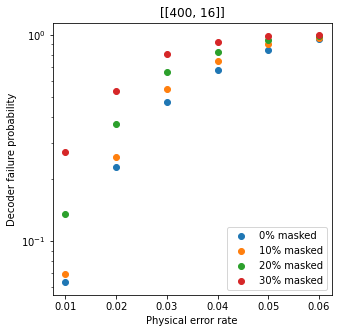

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ps = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
mask0 = [0.063, 0.228, 0.474, 0.678, 0.849, 0.955]
mask01 = [0.069, 0.255, 0.546, 0.746, 0.909, 0.962]
mask02 = [0.135, 0.371, 0.66, 0.824, 0.95, 0.988]
mask03 = [0.27, 0.535, 0.811, 0.922, 0.991, 0.996]

ax.scatter(ps, mask0, label='0% masked')
ax.scatter(ps, mask01, label='10% masked')
ax.scatter(ps, mask02, label='20% masked')
ax.scatter(ps, mask03, label='30% masked')

ax.set_xlabel('Physical error rate')
ax.set_ylabel('Decoder failure probability')
ax.set_yscale('log')
plt.legend(loc='lower right')
plt.title('[[400, 16]]')

Text(0.5, 1.0, '[[2196, 36]]')

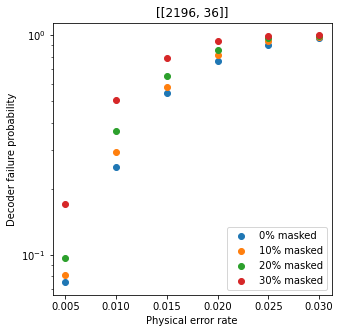

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ps = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
mask0 = [0.075, 0.251, 0.549, 0.764, 0.904, 0.972]
mask01 = [0.081, 0.295, 0.58, 0.812, 0.938, 0.986]
mask02 = [0.097, 0.368, 0.656, 0.862, 0.973, 0.996]
mask03 = [0.17, 0.51, 0.79, 0.946, 0.99, 1.0]

ax.scatter(ps, mask0, label='0% masked')
ax.scatter(ps, mask01, label='10% masked')
ax.scatter(ps, mask02, label='20% masked')
ax.scatter(ps, mask03, label='30% masked')

ax.set_xlabel('Physical error rate')
ax.set_ylabel('Decoder failure probability')
ax.set_yscale('log')
plt.legend(loc='lower right')
plt.title('[[2196, 36]]')